# Can You Break the Bell Curve? (2025.01.17)

link: https://thefiddler.substack.com/p/can-you-break-the-bell-curve

In [2]:
from IPython import display

## I. Puzzle

Bean machines can famously produce bell-shaped curves. But today, we’re going to change all that!

Suppose you have a board like the one shown below. The board’s topmost row has three pins (and two slots for a ball to pass through), while the bottommost row has two pins (and three slots for a ball to pass through). The remaining rows alternate between having three pins and two pins.

But instead of the 12 rows of pins in the illustrative diagram, suppose the board has many, many rows. And at the very bottom of the board, just below the two bottommost pins, are three buckets, labeled A, B, and C from left to right.


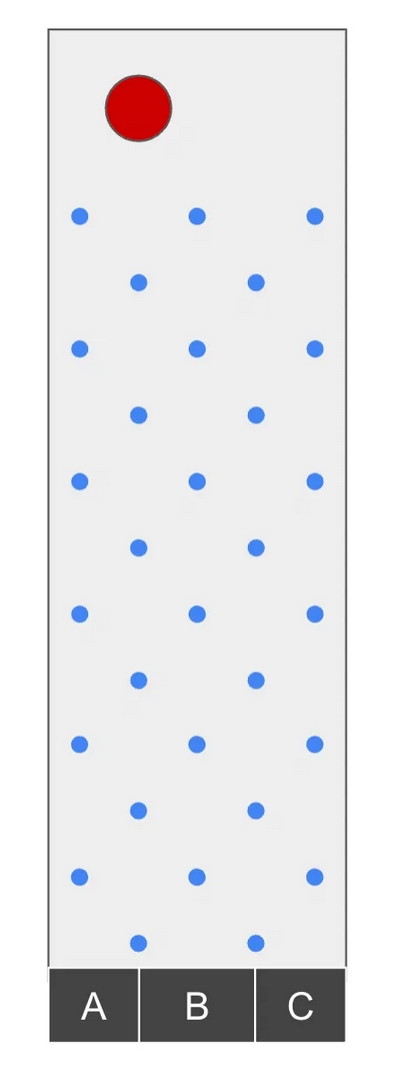

In [7]:
display.Image("files/bean machines.png", width=100)

Whenever a ball encounters one of the leftmost pins, it travels down the right side of it to the next row. And whenever a ball encounters one of the rightmost pins, it travels down the left side of it to the next row.

But this isn’t your garden variety bean machine. Whenever a ball encounters any of the other pins, it has a 75 percent chance of traveling down the right side of that pin, and a 25 percent chance of traveling down the left side of that pin.

A single ball is about to be dropped into the left slot at the top of the board. What is the probability that the ball ultimately lands in bucket A, the leftmost slot at the bottom?

# II. Solution

We answers this with a Markov chain. We count the pin rows from top to bottom and distinguish between odd rows (with 3 pins) and even rows (with two pins). Further we count the spaces between the pins from left to right so that odd rows have 2 spaces and even rows have 3 spaces. Then our system is in state 'odd-1' if the ball is on an odd row in the left space. The following table shows the one-step transition probabilities to get from a state noted on the rows to a state noted in the columns:

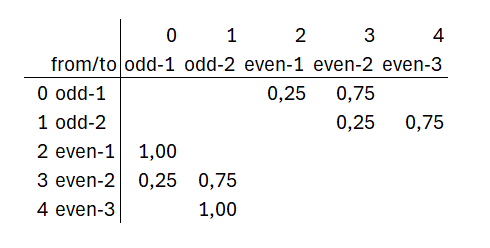

In [8]:
display.Image("files/bean machine markov.png", width=400)

To calculate the probability that the balls lands in the left bucket we multiply the matrix from the above table many, many times:

In [48]:
import numpy as np

matrix = np.zeros([5,5])

matrix[0][2] = .25
matrix[0][3] = .75
matrix[1][3] = .25
matrix[1][4] = .75

matrix[2][0] = 1
matrix[3][0] = .25
matrix[3][1] = .75
matrix[4][1] = 1

mul_iteration = 1000

next_matrix = matrix
for i in range(mul_iteration):
	next_matrix = np.dot(matrix,next_matrix)

print(f'Solution: The probability for the buckets are {next_matrix[0][2:]} and hence the probability for the left bucket is {next_matrix[0][2]:.3f}.')

Solution: The probability for the buckets are [0.025 0.3   0.675] and hence the probability for the left bucket is 0.025.
